In [1]:
import pandas as pd  # Para manipulación de datos
import numpy as np   # Para cálculos numéricos
import seaborn as sns  # Para visualizaciones
import matplotlib.pyplot as plt  # Para personalizar gráficos
import plotly.express as px  # Para gráficos interactivos
plt.style.use('seaborn-v0_8-darkgrid')  # Using 'seaborn-v0_8-darkgrid' instead of 'seaborn'
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
data = pd.read_csv('steam.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [ ]:
data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [3]:
data["release_date"] = pd.to_datetime(data["release_date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appid             27075 non-null  int64         
 1   name              27075 non-null  object        
 2   release_date      27075 non-null  datetime64[ns]
 3   english           27075 non-null  int64         
 4   developer         27074 non-null  object        
 5   publisher         27061 non-null  object        
 6   platforms         27075 non-null  object        
 7   required_age      27075 non-null  int64         
 8   categories        27075 non-null  object        
 9   genres            27075 non-null  object        
 10  steamspy_tags     27075 non-null  object        
 11  achievements      27075 non-null  int64         
 12  positive_ratings  27075 non-null  int64         
 13  negative_ratings  27075 non-null  int64         
 14  average_playtime  2707

In [ ]:
data.sort_values(by='release_date')

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
2685,282010,Carmageddon Max Pack,1997-06-30,1,Stainless Games Ltd,THQ Nordic,windows,0,Single-player;Multi-player;Steam Trading Cards,Action;Indie;Racing,Racing;Action;Classic,0,352,35,13,13,50000-100000,5.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27060,1062240,地铁：恐怖末班车,2019-04-25,0,QZQ Studio,"H.P.Y.S,LLC",windows,0,Single-player,Action;Adventure;Indie;RPG,Action;Adventure;RPG,0,0,2,0,0,0-20000,2.09
26695,1031920,Симулятор Сидения у Подъезда,2019-04-25,0,Kavkaz Sila Games,Kavkaz Sila Games,windows,18,Single-player;Steam Achievements,Simulation,Simulation,1,9,2,0,0,0-20000,0.79
22522,865250,Phase Shift,2019-04-25,1,DWSK Ltd,DWSK Ltd,windows,0,Single-player;Multi-player;Online Multi-Player...,Casual;Indie;Simulation;Early Access,Early Access;Rhythm;Music,9,36,14,0,0,0-20000,11.99
24430,931690,Himno,2019-04-26,1,David Moralejo Sánchez,GrabTheGames,windows,0,Single-player;Steam Achievements;Partial Contr...,Adventure;Casual;Free to Play;Indie,Indie;Casual;Free to Play,11,163,30,0,0,20000-50000,0.00


In [ ]:
data.sort_values(by='release_date', ascending=False)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
23726,905370,Conqueror's Blade,2019-05-01,1,Booming Games,My.com,windows,0,Online Multi-Player;MMO;Online Co-op;In-App Pu...,Action;Free to Play;Massively Multiplayer;RPG;...,Action;Strategy;RPG,0,259,235,0,0,0-20000,11.39
24430,931690,Himno,2019-04-26,1,David Moralejo Sánchez,GrabTheGames,windows,0,Single-player;Steam Achievements;Partial Contr...,Adventure;Casual;Free to Play;Indie,Indie;Casual;Free to Play,11,163,30,0,0,20000-50000,0.00
18100,735660,Steamcraft,2019-04-25,1,Last Level;SOFF Games,Last Level,windows,0,Multi-player;Online Multi-Player;MMO;Online Co...,Action;Massively Multiplayer;Racing,Massively Multiplayer;Action;Racing,72,56,24,0,0,0-20000,12.99
25966,995050,Havocado,2019-04-25,1,Webble Games,Webble Games,windows;mac,0,Multi-player;Online Multi-Player;Local Multi-P...,Action;Indie;Early Access,Early Access;Action;Indie,0,9,3,0,0,0-20000,7.19
17526,718590,Dark Devotion,2019-04-25,1,Hibernian Workshop,The Arcade Crew;Maple Whispering Limited,windows,16,Single-player;Steam Achievements;Full controll...,Action;Adventure;Indie;RPG,Action;Indie;Adventure,45,186,78,0,0,0-20000,17.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19


In [4]:
# Comprobacion de la calidad de los datos
def calidad_datos(data):
    resumen = {
        'missing_values': data.isnull().sum(),  # Valores faltantes
        'dtypes': data.dtypes,  # Tipos de datos
        'descripcion': data.describe(),  # Estadísticas básicas
        "invalid_age" : data[(data['required_age'] < 0) | (data['required_age'] > 100)]
    }
    return resumen
# Calling the function and storing the result
resumen_datos = calidad_datos(data)
# Displaying the result
resumen_datos

{'missing_values': appid                0
 name                 0
 release_date         0
 english              0
 developer            1
 publisher           14
 platforms            0
 required_age         0
 categories           0
 genres               0
 steamspy_tags        0
 achievements         0
 positive_ratings     0
 negative_ratings     0
 average_playtime     0
 median_playtime      0
 owners               0
 price                0
 dtype: int64,
 'dtypes': appid                        int64
 name                        object
 release_date        datetime64[ns]
 english                      int64
 developer                   object
 publisher                   object
 platforms                   object
 required_age                 int64
 categories                  object
 genres                      object
 steamspy_tags               object
 achievements                 int64
 positive_ratings             int64
 negative_ratings             int64
 average_playtime    

- Cantidad de datos: Como podemos observar en el analisis exploratorio de la base de datos de steam tenemos un total de 27075 entradas de datos, el conjunto de datos nos indica tanto los titulos de los juegos de steam.
- Variables incluidas: En base a lo anterior tambien podemos visualizar el hecho de poseer 18 variables dentro de las cuales encontramos tales como id, el nombre del videojuego, el desarrollador y el publicador, en las plataformas que salio el videojuego, categorias, ratins tanto positivos como negativos, precio, tiempo de juego y jugadores en promedio
- Período temporal: En base al periodo temporal se nos menciona que son datos recopilados de la API de de Steam Store y SteamSpy reunidos alrededor de mayo 2019, donde tenemos juegos mas antiguos como Carmageddon Max Pack el cual salio el 30 de junio del año 1997 y el juego con el lanzamiento mas reciente el cual es Conqueror's Blade	 con su fecha del 01 de mayo del 2019
- Calidad de datos: para basarnos en la calidad de los datos vemos 14 valores faltantes en lo que es publisher, lo que puede indicar que en algunos casos como un videojuego en que su mismo developer publico el juego, a su ves vemos que las variables como la edad coinciden con el hecho de no superar los 100 años, otro punto a destacar es que estos datos son de juegos de maximo mayo 2019, estando ya en 2024 estos datos estan descontinuados

2. Checklist de Limpieza

Valores faltantes, como pudimos observar tenemos 14 valores faltantes que serán rellenados con "Unknown"

In [5]:
data['publisher'].fillna('Unknown', inplace=True)

<ipython-input-5-d931396897d3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['publisher'].fillna('Unknown', inplace=True)


Developer también presenta valores faltantes, se rellerán con "Unknown"

In [6]:
data['developer'].fillna('Unknown', inplace=True)

<ipython-input-6-59e633c77790>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['developer'].fillna('Unknown', inplace=True)


In [ ]:
data['platforms'].unique()

array(['windows;mac;linux', 'windows;mac', 'windows', 'windows;linux',
       'mac', 'mac;linux', 'linux'], dtype=object)

In [7]:
data.isna().sum()

,0
appid,0
name,0
release_date,0
english,0
developer,0
publisher,0
platforms,0
required_age,0
categories,0
genres,0


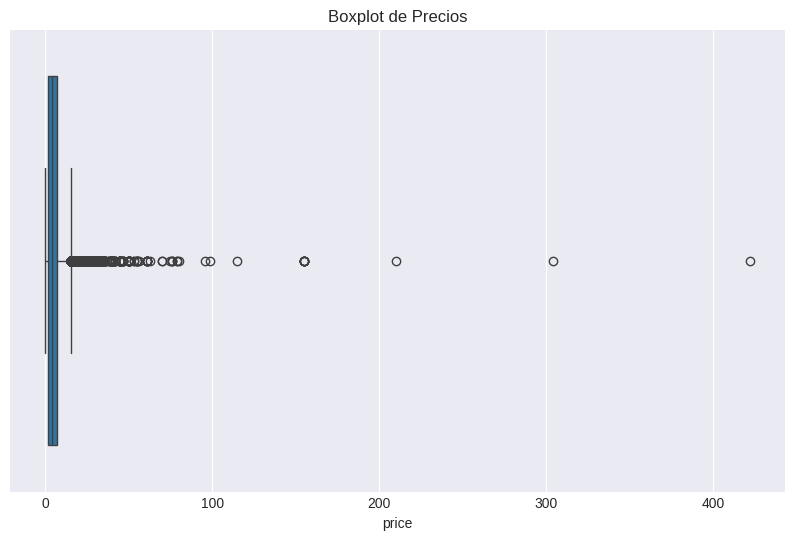

In [8]:
# Outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=data['price'])
plt.title('Boxplot de Precios')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=data['positive_ratings'])
plt.title('Boxplot Positivos')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=data['negative_ratings'])
plt.title('Boxplot Negativos')
plt.show()

In [9]:
# Verificar si hay duplicados en el conjunto de datos
duplicados = data.duplicated()
print(f"Total de filas duplicadas: {duplicados.sum()}")

# Mostrar las filas duplicadas si existen
if duplicados.sum() > 0:
    print("Filas duplicadas encontradas:\n", data[duplicados])
else:
    print("No hay filas duplicadas en el conjunto de datos.")

Total de filas duplicadas: 0
No hay filas duplicadas en el conjunto de datos.


In [10]:
# Formatos estándar:
print("📊 Dimensiones del Dataset:")
print(f"Filas: {data.shape[0]}") # Accessing shape directly from data
print(f"Columnas: {data.shape[1]}\\n") # Accessing shape directly from data
print("🔍 Tipos de Datos:")
print(resumen_datos['dtypes'])

📊 Dimensiones del Dataset:
Filas: 27075
Columnas: 18\n
🔍 Tipos de Datos:
appid                        int64
name                        object
release_date        datetime64[ns]
english                      int64
developer                   object
publisher                   object
platforms                   object
required_age                 int64
categories                  object
genres                      object
steamspy_tags               object
achievements                 int64
positive_ratings             int64
negative_ratings             int64
average_playtime             int64
median_playtime              int64
owners                      object
price                      float64
dtype: object


Análisis RFM

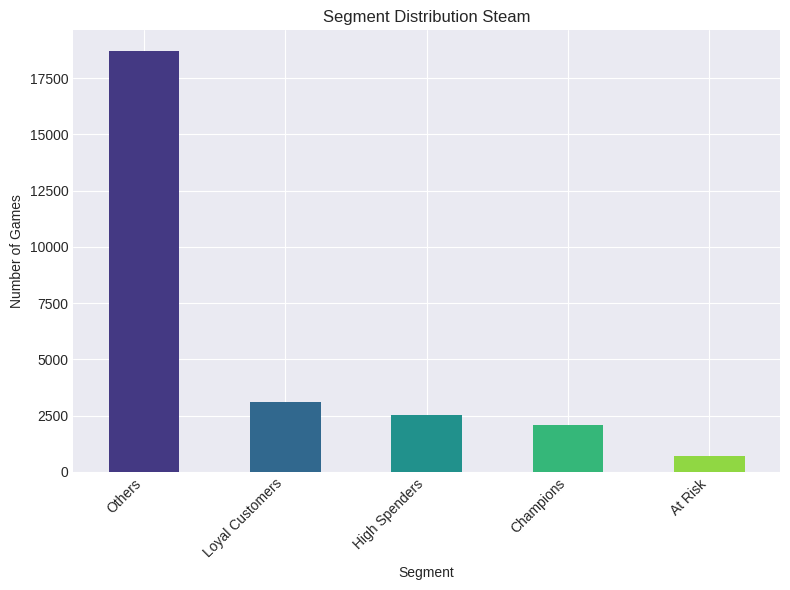

In [12]:
# Escalado de variables específicas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['average_playtime', 'positive_ratings', 'price']])
def extract_mean_owners(owner_range):
    numbers = [int(x.strip()) for x in owner_range.replace(',', '').split('-')]
    return sum(numbers) / len(numbers)
# Análisis RFM
data['owners_mean'] = data['owners'].apply(extract_mean_owners)
current_date = pd.Timestamp('2024-12-19')

# Creación R, F, M
rfm = pd.DataFrame()
rfm['Recency'] = (current_date - data['release_date']).dt.days
rfm['Frequency'] = data['positive_ratings'] + data['negative_ratings']
rfm['Monetary'] = data['price'] * data['owners_mean']

for column in ['Recency', 'Frequency', 'Monetary']:
    rfm[f'{column}_Score'] = pd.qcut(rfm[column], q=5, labels=[1, 2, 3, 4, 5])

# Creamos nuevas variables asegurándonos que son números enteros
rfm['RFM_Score'] = (
    rfm['Recency_Score'].astype(int) +
    rfm['Frequency_Score'].astype(int) +
    rfm['Monetary_Score'].astype(int)
)
# Segmentación en base RFM
def segment_rfm(score):
    if score == 15:
        return 'Champions'
    elif score >= 13 and score <= 15: # Starts with 5 (Recency Score)
       return 'Loyal Customers'
    elif score % 10 == 5: # Ends with 5 (Monetary Score)
        return 'High Spenders'
    elif score == 3:
        return 'At Risk'
    else:
        return 'Others'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_rfm)
segment_counts = rfm['Segment'].value_counts()
# Graficar
plt.figure(figsize=(8, 6))
segment_counts.plot(kind='bar', color=sns.color_palette('viridis',len(segment_counts)))
plt.title('Segment Distribution Steam')
plt.xlabel('Segment')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Análisis de los Resultados
Con base en el gráfico que generaste:

Others: Representan la mayor cantidad de registros en tu dataset (posiblemente clientes con características promedio o bajos valores RFM).
Champions y Loyal Customers: Aunque son una fracción menor, son los grupos de mayor valor estratégico. Atraer y mantener a estos clientes es clave para la rentabilidad.
High Spenders: Gastan mucho pero pueden requerir estrategias específicas para mejorar su recencia y frecuencia.
At Risk: Representan una oportunidad de reactivación, pero el costo de hacerlo puede no justificarlo si su monetario es bajo.

Recomendaciones Estratégicas
Para Champions:
Fidelizarlos con promociones exclusivas, programas de lealtad y contenido personalizado.
Para Loyal Customers:
Incentivar su compromiso con ofertas atractivas y reforzar su lealtad.
Para High Spenders:
Introducir estrategias de upselling y cross-selling para maximizar su valor.
Para At Risk:
Intentar reactivarlos mediante campañas de retargeting o promociones especiales si su valor lo justifica.
Para Others:
Analizar subgrupos dentro de este segmento para identificar oportunidades de mejora o de crecimiento.

Clustering

In [13]:
# Seleccionar las columnas relevantes para clustering
clustering_data = rfm[['Recency', 'Frequency', 'Monetary']]

# Escalar los datos para normalizar las métricas
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)


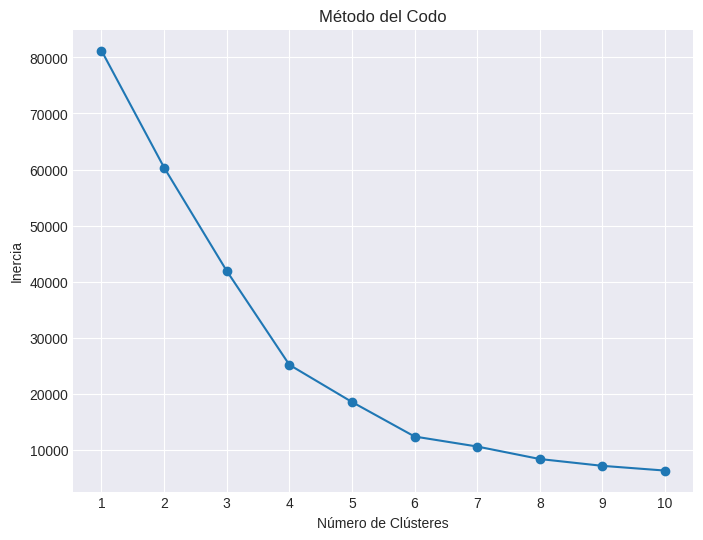

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcular la inercia para diferentes números de clústeres
inertia = []
k_range = range(1, 11)  # Probar de 1 a 10 clústeres
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


Deberían ser entre 4 - 6 clústers, probamos con ambas opciones

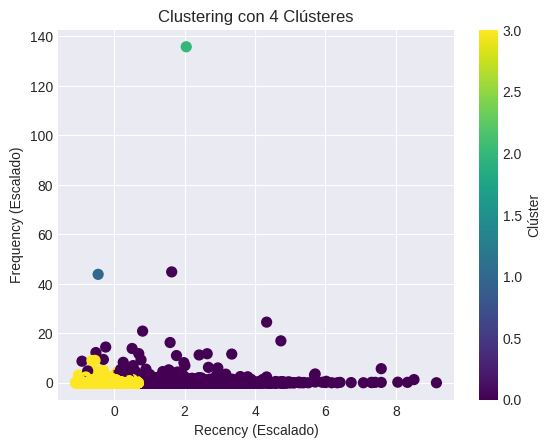

In [15]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
rfm['Cluster_4'] = kmeans_4.fit_predict(scaled_data)

# Visualizar
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=rfm['Cluster_4'], cmap='viridis', s=50)
plt.title('Clustering con 4 Clústeres')
plt.xlabel('Recency (Escalado)')
plt.ylabel('Frequency (Escalado)')
plt.colorbar(label='Clúster')
plt.grid(True)
plt.show()

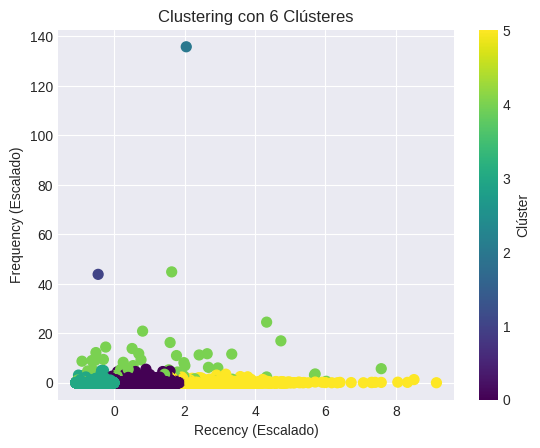

In [17]:
kmeans_6 = KMeans(n_clusters=6, random_state=42)
rfm['Cluster_6'] = kmeans_6.fit_predict(scaled_data)

# Visualizar
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=rfm['Cluster_6'], cmap='viridis', s=50)
plt.title('Clustering con 6 Clústeres')
plt.xlabel('Recency (Escalado)')
plt.ylabel('Frequency (Escalado)')
plt.colorbar(label='Clúster')
plt.grid(True)
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

# Silhouette score para 4 clústeres
silhouette_4 = silhouette_score(scaled_data, kmeans_4.labels_)
print(f"Silhouette Score para 4 clústeres: {silhouette_4}")

# Silhouette score para 6 clústeres
silhouette_6 = silhouette_score(scaled_data, kmeans_6.labels_)
print(f"Silhouette Score para 6 clústeres: {silhouette_6}")


Silhouette Score para 4 clústeres: 0.6483475318499252
Silhouette Score para 6 clústeres: 0.588245561925852


Con base en los Silhouette Scores:

4 clústeres son más adecuados, ya que ofrecen una mejor definición y calidad de segmentación.
La solución con 6 clústeres genera más grupos, pero a costa de cohesión y separación.

<Axes: title={'center': 'Gasto Promedio por Clúster'}, xlabel='Cluster_4'>

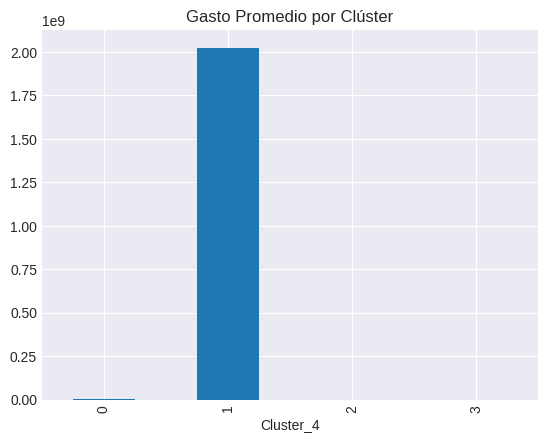

In [22]:
rfm.groupby('Cluster_4')['Monetary'].mean().plot(kind='bar', title='Gasto Promedio por Clúster')

Customer Lifetime Value

In [23]:
# Definir una duración promedio (en meses o años)
average_customer_duration = 12  # Por ejemplo, 12 meses

# Calcular CLV
rfm['CLV'] = rfm['Monetary'] * rfm['Frequency'] * average_customer_duration


In [24]:
# Agrupar por segmento y calcular el CLV promedio
clv_segment = rfm.groupby('Segment')['CLV'].mean().reset_index()
# Mostrar el resultado
print(clv_segment)

           Segment              CLV
0          At Risk        349796.52
1        Champions 4585279025768.04
2    High Spenders       2035433.60
3  Loyal Customers 1257886617136.25
4           Others 1391147949495.38


<ipython-input-25-5546f4e1bd30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clv_segment, x='Segment', y='CLV', palette='viridis')


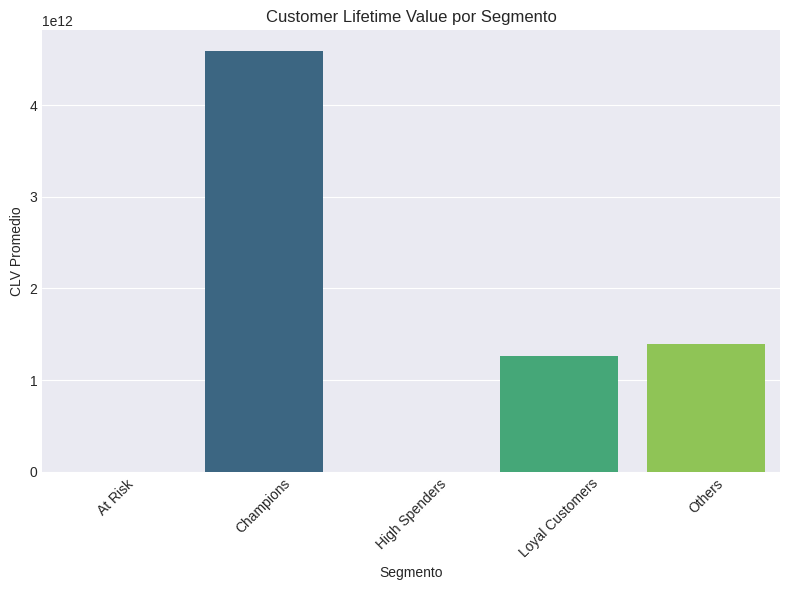

In [25]:
# Graficar el CLV promedio por segmento
plt.figure(figsize=(8, 6))
sns.barplot(data=clv_segment, x='Segment', y='CLV', palette='viridis')
plt.title('Customer Lifetime Value por Segmento')
plt.xlabel('Segmento')
plt.ylabel('CLV Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Champions y High Spenders:
Ofrecer programas de lealtad para maximizar la retención.
Incentivar recomendaciones para atraer clientes similares.
Loyal Customers:
Incrementar el valor monetario con ofertas exclusivas o cross-selling.
At Risk:
Reactivarlos con descuentos o campañas personalizadas.
Others:
Evaluar si es rentable invertir recursos en su retención o adquirir nuevos clientes.

Exportamos la data para las visualizaciones en tableau

In [ ]:
steam_nuevo = data.copy()
steam_nuevo.to_excel('steam_nuevo.xlsx', index=False)

In [ ]:
rfm.to_excel('rfm.xlsx', index=False)

Predicción de churn a la data original

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Seleccionar variables clave para la predicción
variables_clave = ['average_playtime', 'median_playtime', 'price', 'genres', 'achievements']

# Crear una etiqueta para churn: jugadores inactivos si el tiempo promedio de juego es bajo (por ejemplo, <60 minutos)
data['churn'] = (data['average_playtime'] < 60).astype(int)

# Convertir la variable 'genres' a un formato numérico
label_encoder = LabelEncoder()
data['genres_encoded'] = label_encoder.fit_transform(data['genres'])

# Variables para el modelo
X = data[['average_playtime', 'median_playtime', 'price', 'achievements', 'genres_encoded']]
y = data['churn']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar un modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['Activo', 'Inactivo'])

print(report)


              precision    recall  f1-score   support

      Activo       1.00      1.00      1.00      1443
    Inactivo       1.00      1.00      1.00      6680

    accuracy                           1.00      8123
   macro avg       1.00      1.00      1.00      8123
weighted avg       1.00      1.00      1.00      8123



In [27]:
# Revisar el balance de clases en los datos
class_balance = data['churn'].value_counts(normalize=True)

# Mostrar el balance de clases
class_balance
# 1 corresponde a inactivos, 0 activos

,proportion
churn,
1,0.82
0,0.18


Aplicación de sobremuestreo

In [28]:
from sklearn.utils import resample

# Separar las clases mayoritaria y minoritaria
data_majority = data[data['churn'] == 1]
data_minority = data[data['churn'] == 0]

# Aplicar sobremuestreo en la clase minoritaria
data_minority_upsampled = resample(
    data_minority,
    replace=True,  # Muestra con reemplazo
    n_samples=len(data_majority),  # Igualar al tamaño de la clase mayoritaria
    random_state=42
)

# Combinar las clases balanceadas
data_balanced = pd.concat([data_majority, data_minority_upsampled])

# Variables para el modelo balanceado
X_balanced = data_balanced[['average_playtime', 'median_playtime', 'price', 'achievements', 'genres_encoded']]
y_balanced = data_balanced['churn']

# Dividir los datos balanceados en entrenamiento y prueba
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

# Entrenar un modelo con los datos balanceados
rf_model_balanced = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_balanced.fit(X_train_balanced, y_train_balanced)

# Predicciones y evaluación
y_pred_balanced = rf_model_balanced.predict(X_test_balanced)
balanced_report = classification_report(y_test_balanced, y_pred_balanced, target_names=['Activo', 'Inactivo'])

print(balanced_report)


              precision    recall  f1-score   support

      Activo       1.00      1.00      1.00      6680
    Inactivo       1.00      1.00      1.00      6679

    accuracy                           1.00     13359
   macro avg       1.00      1.00      1.00     13359
weighted avg       1.00      1.00      1.00     13359



Regresión logística

In [29]:
from sklearn.linear_model import LogisticRegression

# Entrenar un modelo de Regresión Logística con los datos balanceados
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_balanced, y_train_balanced)

# Predicciones y evaluación
y_pred_logistic = logistic_model.predict(X_test_balanced)
logistic_report = classification_report(y_test_balanced, y_pred_logistic, target_names=['Activo', 'Inactivo'])

print(logistic_report)


              precision    recall  f1-score   support

      Activo       1.00      1.00      1.00      6680
    Inactivo       1.00      1.00      1.00      6679

    accuracy                           1.00     13359
   macro avg       1.00      1.00      1.00     13359
weighted avg       1.00      1.00      1.00     13359



Probamos con el data frame "rfm"

In [30]:
# Crear una nueva columna para indicar churn:
# Considerar que los clientes fuera del segmento "Champions" tienen mayor probabilidad de abandono.
rfm['churn'] = (rfm['Segment'] != 'Champions').astype(int)

# Seleccionar las variables relevantes para el modelo
X_rfm = rfm[['Recency', 'Frequency', 'Monetary', 'Recency_Score', 'Frequency_Score', 'Monetary_Score']]
y_rfm = rfm['churn']

# Dividir los datos en entrenamiento y prueba
X_train_rfm, X_test_rfm, y_train_rfm, y_test_rfm = train_test_split(
    X_rfm, y_rfm, test_size=0.3, random_state=42, stratify=y_rfm
)

# Entrenar un modelo de Random Forest para predecir churn basado en RFM
rf_model_rfm = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_rfm.fit(X_train_rfm, y_train_rfm)

# Predicciones y evaluación
y_pred_rfm = rf_model_rfm.predict(X_test_rfm)
rfm_report = classification_report(y_test_rfm, y_pred_rfm, target_names=['No Churn', 'Churn'])

print(rfm_report)


              precision    recall  f1-score   support

    No Churn       1.00      1.00      1.00       627
       Churn       1.00      1.00      1.00      7496

    accuracy                           1.00      8123
   macro avg       1.00      1.00      1.00      8123
weighted avg       1.00      1.00      1.00      8123

